## Google Colab Arbeitplatz vorbereiten

In [ ]:
!git clone https://github.com/edadunashvili/Monographie.git

In [ ]:
cd /content/Monographie

In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

# Auswertung

[Zelle # 1]

1-2: Die Variable 'repert' gilt für die gezielte Auswahl der  in dem Trainingdatenrepositorium angelegte Texte aus vorbestimmten  Herkunftsrepertoires. Die Variable kann mit einem oder mehreren werten ausgefült werden z.B. ['deu','kat'] oder auch leer bleiben z.B. ['']. Variable 'typNum' gilt für die gezielte Zugriff auf einen Typ innerhalb der ausgewählten Repertoires. Auch diese Variable darf leer bleiben.

3-7: Jedes Mal bei der Aggregation des Korpus von Forschungsdaten wird der gleichnamige alte Korpus gelöscht.

8-60: Die im Ordner „Forschungsdaten“ angelegte TXT Dateien werden in der CSV-Korpus aggregiert und in das root Repositorium verlegt. 

61-78: 'episode_temp_auswerter.csv' laden, von den überflüssigen Zeichen bereinigen und in die Korpusdatei 'episode_string_auswerter.csv' umwandeln.

79: Unnötige Aggregation wird gelöscht.

80-84: Die im aggregierten Forschungsdatenkorpus vorhandenen Markupelemente (mitsamt der Häufigkeitsindizien) werden abgerufen.

Anmerkung: Der Wert 'ballast' gilt für den ersten Datensatz im aggregierten Datenkorpus. Er sorgt dafür, dass der synthetische Episode 'Anf_' auch dann generiert wird wenn der erste Datensatz im Korpus der gesuchte Episode ist (vgl. Zelle # 2, Zeile 32-33).

In [35]:
repert=['deu','fra','ita']
typNum='300'
def entfernen(var):
    import os
    if os.path.exists(var):
        os.remove(var)
entfernen('episode_string_auswerter.csv')
def word_to_lex(word):
    ret=(word) 
    return ret
def write_back(words):
    with open('episode_temp_auswerter.csv',"a", encoding='utf-8', errors='ignore') as output:
        for word in words:
            as_lex = word_to_lex(word[0])
            full_word = '"' + as_lex + '"'
            for sub_word in word[1:]:
                full_word += " , "  '"' + sub_word + '"'
            full_word +="\n"
            output.write(full_word)
def clean(line):
    line = line.replace("\n"," ").strip()
    line = line.replace("ä","ae").replace("ü","ue").replace("ö","oe")
    line = line.replace("ß","ss").replace(",","").replace("«","")
    line = line.replace("»","").replace(".","").replace(":","")
    line = line.replace(";","").replace('"',"")
    line = line.replace("?","").replace("!","").replace("á","a")
    line = line.replace(",","").replace("\t"," ").replace("'","")
    line = line.replace("‹","").replace("›","").replace("-"," ")
    line = line.replace("'('","").replace("')'","").replace('>','')
    line = line.replace("    "," ").replace("   "," ").replace("  "," ")
    line = line.replace('–','').replace('—','').replace('<','')
    line = line.replace("Â", "A").replace("ø", "oe").replace('“','')
    line = line.replace('„','').replace('(','').replace(')','')
    line = line.replace("‚", "").replace(']','').replace('[','')
    if line == "": 
        return
    line=line.split("|")
    line[0]=line[0].split("|")[0]
    for i, _ in enumerate(line):
        if (i !=0) and (i!=2):
            line[i]=line[i].lower()
    flex=[]
    try:
        flex=line[1].split("")
    except:
        pass
    value=str(line)
    line=str(line)   
    flex.append(line)
    ret=[]
    for i in flex:
        ret.append((i,value[0]))
    return ret
    for i in flex:
        ret.append((i,value[0]))
    return ret
with open('episode_temp_auswerter.csv', "w", encoding='utf-8', errors='ignore') as output:
    output.write ("quelle,episode,index_string,index_binar\n")
    output.write('000_ballast,ballast,ballast,0')
    output.write('\n')
pairs = []
import glob as glob
for file in glob.glob("Forschungsdaten/*.txt"):  
    for any in repert:
        if any in file and typNum in file:
            with open(file, 'r', encoding='utf-8', errors='ignore') as episode:  
                for line in episode.readlines():
                        clean_words = clean(line)
                        pairs = pairs + clean_words
write_back(pairs)
fin = open('episode_temp_auswerter.csv','r', encoding ='utf-8')
fout = open('episode_string_auswerter.csv', "wt", encoding ='utf-8')
for kfz in fin:
    fout.write(kfz.replace(', "["',"").replace('"[', "")
               .replace(']"',"").replace("', '", "','")
               .replace(" '", "'").replace("'","").replace ('"',''))
fin.close()
fout.close()
entfernen('episode_temp_auswerter.csv')
import pandas as pd
df = pd.read_csv('episode_string_auswerter.csv', encoding='utf-8')
from collections import Counter
indexliste=Counter(df.index_string)
print(indexliste, sep='\n')

Counter({'e300_e_vorfeld_des_kampfes_bis_zum_sieg': 25, 'e300_c_anfangssituation_ankunft_und_erkundigung_der_not': 23, 'e300_o_auftritt_des_HD_vor_dem_AG_bis_zur_erkennung_seiner_heldentat': 22, 'e300_g_nach_dem_sieg_bis_zur_trennung_des_HD_und_des_OB': 18, 'e300_k_misshandlung_des_FH_bis_zur_hochzeit': 17, 'e303_c_eingangssituation_bis_zur_trennung': 15, 'e300_m_rueckkehr_des_HD_und_erkundung_ueber_die_hochzeit_bis_zum_wiedergewinn_der_aufmerksamkeit': 14, 'eUNDF_a_': 12, 'e303_g_erstes_treffen_mit_dem_AN': 12, 'e303_i_von_der_erkundigung_der_not_bis_zum_aufbruch_des_HF_zum_AN': 11, 'e303_k_vom_aufbruch_zum_AN_bis_zum_sieg_ueber_ihn': 11, 'e554_e_leistung_des_HD_gegenueber_dem_tier_und_aussprechen_der_dankbarkeit': 7, 'eCoM_c_conceptia_magica': 7, 'e300_l_wiederbelebung_des_HD': 6, 'e315_a_': 5, 'e550_a_': 5, 'e303_m_eifersucht': 4, 'e562_a_': 4, 'e316_a_': 3, 'e567_a_': 3, 'e303_q_rueckkehr_und_finale': 3, 'e300_i_rueckkehr_des_OB_und_die_suche_nach_dem_HD': 3, 'e554_g_verstoss_auf_d

[Zelle # 2] 

1-40: Das Skript sorgt dafür, dass die in den betrachteten Texten vorhandenen Annotationen in eine Kette der vorherigen, der gesuchten und der folgenden Episoden als Gliedern der gesamten Kette dargestellt werden.

41-50: Das Skript extrachiert alle im Korpus vorhandene Episoden.

51-66: Die extrahierte Episoden werden an die Glieder der gesuchten Episodengruppe umlegen. Die festlegung der gesuchten Episodengruppe sowie Erschienen der mit einander verkettete Episodenliste erfolgt in der nächsten Zelle.

In [36]:
import pandas as pd
df = pd.read_csv('episode_string_auswerter.csv', encoding='utf-8')
from collections import Counter
def ep_format(ep_full):
    return (ep_full.split('_'))[0]
def ep_name_format(ep_full):
    sublist = (ep_full.split('_'))[0:2]
    name = ""
    for strg in sublist:
        name += strg+'_'
    return name
def ep_name_vollformat(ep_full):
    sublist = (ep_full.split())
    vollname = ""
    for strg in sublist:
        vollname += strg
    return vollname
def quellenvergleich (df, i1, i2):
    return df.quelle[i1]==df.quelle[i2]
def ast(gesep, df):
    ep_tree = {}
    a_liste = []
    z_liste = []  
    df_len = len(df.index_string)
    for i, ep in enumerate(df.index_string):
        if gesep == ep:
            if (i > 0)&(quellenvergleich(df, i, i-1)):
                a = df.index_string[i-1]
            else:
                a = 'Anf-'+ep_name_format(gesep)
            if (i < df_len - 1):
                if not (quellenvergleich(df, i, i+1)):
                    z = 'End-'+ep_name_format(gesep)
                else:        
                    z = df.index_string[i+1]
            else:
                z = 'End-'+ep_name_format(gesep)
            a_liste.append(a)
            z_liste.append(z)
    return {gesep: [Counter(a_liste), Counter(z_liste)]}
def alle_aeste(gesep, df):
    episoden_baeume = {} 
    ep_list = []
    for ep_full in df.index_string:         
        ep = ep_format(ep_full)      
        if gesep == ep:                      
            ep_list.append(ep_full)
    for ep in set(ep_list):
        episoden_baeume.update(ast(ep,df))
    return episoden_baeume
def key_val_printer(d):
    for k, v in d.items():
        print(v, k, sep=':')
def neukey_val_printer(d):
    for k, v in d.items():
        print(k)
def baum_printer(baeume: dict, baum: str):
    key_val_printer (baeume[baum][0])
    print(65*'-')
    print(sum(baeume[baum][0].values()),':', baum)
    print(65*'-')
    key_val_printer(baeume[baum][1])
def wald_printer(wald: dict):
    for baum in sorted(wald.keys()): # for baum in (wald.keys()):
        baum_printer (wald, baum)
        print(65*'=')    

[Zelle # 3] - Hier wird die gesuchte Episode allein oder mit der Episodengruppen aus dem kombinierten Typ bestimmt. Nach der Ausführung des Skripts wird die entsprechende Episodenkette ausgewertet. Die dabei erscheinende Liste besteht aus Tripletten (die durch doppelte Linien getrennte Zeilengruppen). Jedes Triplett besteht aus einer mittleren Episode (die mit einfachen Linien umgebene Zeilen), welche mit einer bzw. mehreren oberen und unteren Episoden umgeben wird. Jedes Glied aus der gesuchten Episodengruppe soll als Triplett aller diese drei Mitglieder dargestellt werden. Hat eine Episode keine Anfangs- oder Ergänzungsglied so werden an der entsprechenden Stelle der Liste jeweils ein synthetischer Episode-Status: ‘Anf-e123_a_‘ oder ‘End-e123_a_‘ generiert. Somit stellt jede Episode des gesuchten Typs eine Mittlere Episode dar und tritt in Bezug auf andere Episoden (der gleichen oder anderer Kategorien) als deren vorläufige oder/und nachfolgende Episode auf.

1: Eingabefeld für die gesuchte Episode

2 - n: Eingabefeld für kombinierte Episodengruppen (das Eingabefeld <graph.update(alle_aeste("'", df)> kann kopiert und vervielfacht werden. 

Letzte Zeile: Visualisierung der Episodenkette.

In [37]:
graph = alle_aeste("e300", df)
graph.update(alle_aeste("", df))
graph.update(alle_aeste("", df))
graph.update(alle_aeste("", df))
graph.update(alle_aeste("", df))
graph.update(alle_aeste("", df))
graph.update(alle_aeste("", df))
graph.update(alle_aeste("", df))
graph.update(alle_aeste("", df))
wald_printer(graph)

1:e302_c_verlust_des_OB_wird_artikuliert
5:e554_e_leistung_des_HD_gegenueber_dem_tier_und_aussprechen_der_dankbarkeit
6:e303_c_eingangssituation_bis_zur_trennung
1:e303_i_von_der_erkundigung_der_not_bis_zum_aufbruch_des_HF_zum_AN
5:eUNDF_a_
1:Anf-e300_c_
2:e315_a_
2:e562_a_
-----------------------------------------------------------------
23 : e300_c_anfangssituation_ankunft_und_erkundigung_der_not
-----------------------------------------------------------------
1:e302_m_kampf_bis_zum_sieg
21:e300_e_vorfeld_des_kampfes_bis_zum_sieg
1:e554_g_verstoss_auf_die_herausforderungen_bis_zum_beginn_der_loesungsmassnahmen
21:e300_c_anfangssituation_ankunft_und_erkundigung_der_not
1:e550_a_
2:eUNDF_a_
1:e554_m_nach_der_erfuellung_der_letzten_aufgabe_bis_zum_ende_der_geschichte
-----------------------------------------------------------------
25 : e300_e_vorfeld_des_kampfes_bis_zum_sieg
-----------------------------------------------------------------
17:e300_g_nach_dem_sieg_bis_zur_trennung_des_

[Zelle # 4]

1-78: Die in obiger Liste Dargestellte Begegnungen von Typen bzw. Episoden werden in Graphen umwandelt.

In [38]:
import matplotlib.pyplot as plt
import networkx as nx

def cutoff_ast_data(wuerzel, graph, nachbar_liste, cutoff = 0):
    vor = graph[wuerzel][0]
    zurueck = graph[wuerzel][1]
    nachbarn = vor.copy()
    nachbarn.update(zurueck)
    for ast_name, ast_gewicht in sorted(nachbarn.items()):
        if (ast_gewicht >= cutoff):
             nachbar_liste.append([ep_name_format(wuerzel), 
                                   ep_name_format(ast_name), ast_gewicht]) 
def cutoff_ast_volldata(wuerzel, graph, nachbar_liste, cutoff = 0):
    vor = graph[wuerzel][0]
    zurueck = graph[wuerzel][1]
    nachbarn = vor.copy()
    nachbarn.update(zurueck)
    for ast_name, ast_gewicht in sorted(nachbarn.items()):
        if (ast_gewicht >= cutoff):
             #nachbar_liste.append([ep_name_vollformat(wuerzel), ep_name_vollformat(ast_name), ast_gewicht])
            nachbar_liste.append([wuerzel, ast_name, ast_gewicht]) 
def cutoff_graph_data(graph, cutoff = 0):
    nachbar_liste = []
    for i, (k, v) in enumerate(sorted(graph.items())):
        cutoff_ast_data(k, graph, nachbar_liste, cutoff)
    neue_nachbar_liste = [[i, nachbar] for i, nachbar in enumerate(nachbar_liste)]
    return neue_nachbar_liste
def cutoff_graph_volldata(graph, cutoff = 0):
    nachbar_liste = []
    for i, (k, v) in enumerate(sorted(graph.items())):
        cutoff_ast_volldata(k, graph, nachbar_liste, cutoff)
    neue_nachbar_liste = [[i, nachbar] for i, nachbar in enumerate(nachbar_liste)]
    return neue_nachbar_liste
def interactive_graph_data(graph_data, loesch_index, gew_dict):
    for k, v in gew_dict.items():
        graph_data[k][1][2] = v
    neue_nachbar_liste = [[i, nachbar[1]] for i, 
                          nachbar in enumerate(graph_data) if i not in loesch_index]
    return neue_nachbar_liste

def graph_bauer(graph_data):
    G = nx.Graph()
    w_liste=[]
    for el in graph_data:
        n1 = el[1][0]
        n2 = el[1][1]
        w = el[1][2]
        w_liste.append(w)
        G.add_edge(n1, n2, weight=w)
    return G,w_liste
def show_graph(G,w):
    fh = open("edgelist.utf-8", "wb")
    nx.write_multiline_adjlist(G, fh, 
                               delimiter="\t", encoding="utf-8")
    fh = open("edgelist.utf-8", "rb")
    H = nx.read_multiline_adjlist(fh, 
                                  delimiter="\t", encoding="utf-8")
    for n in G.nodes():
        if n not in H:
            print(False)
    pos = nx.spring_layout(G)
    q = max(w)
    klein = q //3
    gross = q //2  
    wenig = [(u, v) for (u, v, d) in G.edges(data=True) 
             if d["weight"] <klein]
    mehr = [(u, v) for (u, v, d) in G.edges(data=True) 
            if klein <= d["weight"] <=gross]
    viel = [(u, v) for (u, v, d) in G.edges(data=True) 
            if d["weight"] >gross]
    nx.draw(G, pos, edgelist=wenig, font_size=8, 
            edge_color="g", width=1, with_labels=False)
    nx.draw(G, pos, edgelist=mehr, font_size=8, 
            edge_color="b", width=1, with_labels=False)
    nx.draw(G, pos, edgelist=viel, font_size=8, 
            edge_color="r", width=1, with_labels=False)
    for p in pos:  
        pos[p][0] -=0.00
    nx.draw_networkx_labels(G, pos, font_size=13)
    plt.show()

[Zelle # 5] -  Visualisierung der Normalform des Typs durch die Graphen.

1: Häufigkeitsindex anpassen.

2-3: Den Inhalt wird definiert.

4-5: Format (Höhe und Breite) bestimmen und visualisieren lassen (kann man manipulieren).

Die Farben der Kanten sind von folgenden Bedeutung:

•	grün = selten (<=33%)

•	blau = mittel (>33% & <50%)

•	rot = häufig (>= 50%)

6-18: Volständige Name der in der visualisierte Graphen anzutreffenden Knotten (in der alphabetische Reihenfolge)

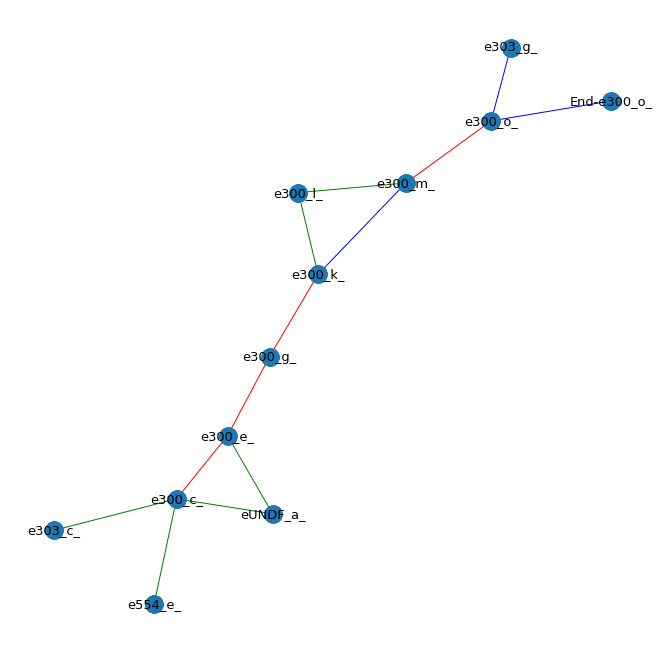

e300_c_anfangssituation_ankunft_und_erkundigung_der_not
e300_e_vorfeld_des_kampfes_bis_zum_sieg
e300_g_nach_dem_sieg_bis_zur_trennung_des_HD_und_des_OB
e300_k_misshandlung_des_FH_bis_zur_hochzeit
e300_l_wiederbelebung_des_HD
e300_m_rueckkehr_des_HD_und_erkundung_ueber_die_hochzeit_bis_zum_wiedergewinn_der_aufmerksamkeit
e300_o_auftritt_des_HD_vor_dem_AG_bis_zur_erkennung_seiner_heldentat
e303_c_eingangssituation_bis_zur_trennung
e303_g_erstes_treffen_mit_dem_AN
e554_e_leistung_des_HD_gegenueber_dem_tier_und_aussprechen_der_dankbarkeit


In [39]:
haeufigkeit=4
auto_graph=cutoff_graph_data(graph, haeufigkeit)
G,W = graph_bauer(auto_graph)
plt.figure(figsize=(9,9)) #15,12 || 12,9
show_graph(G,W)
def make_set_of_chosen_vertives(graph_edge_data):
    chosen_vertices=set()
    for sub_list in graph_edge_data:
        sub_sub_list = sub_list[1]
        chosen_vertices.add(sub_sub_list[0])
        chosen_vertices.add(sub_sub_list[1])
    return chosen_vertices
graph_data = cutoff_graph_volldata(graph, haeufigkeit)
chosen_vertices=list(make_set_of_chosen_vertives(graph_data))
chosen_vertices.sort()    
for vertex_name in chosen_vertices:
    if not (vertex_name.startswith("End") or vertex_name.startswith("Anf")or vertex_name.startswith("eUNDF")):
        print(vertex_name)

### Ende